In [131]:
import numpy as np
from numpy.linalg import norm
from numpy.linalg import inv
import matplotlib.pyplot as plt
import pylab
from mpl_toolkits.mplot3d import Axes3D

In [138]:
### SETTINGS
MAX_COUNT_ITER = 100000
EPS = 10**(-5)
h = np.array([0.0001, 0.0001], dtype = float)

x0 = np.array([-150, 255], dtype = float)

### TARGET FUNCTIONS
def f_teacher(x):
    return x[0]+x[1]

def f_myvar(x):
    return x[0]**2 + 4.0 * x[1]**2 + 0.001 * x[0] * x[1] - x[1]    
#The true solution of the problem is (-0.0000625,  0.1250000)
#The value of function in this point is  2.5626251

def f_Rosenbrock(x):
    return 100.0 * (x[1] - x[0]**2)**2 + (1.0 - x[0])**2 
#The true solution of the problem is (1, 1)
#The value of function in this point is 0

# DIM >2 #
#def f_Powell(x):
#    return (x[0] + 10.0 * x[1])**2 + 5.0 * (x[2] - x[3])**2 + (x[1] - 2.0 * x[2])**4 + 10.0 * (x[0] - x[3])**4
#def f_hard(x):
#    return 3.0 * (x[0] - 1)**2 + 2.0 * (x[1] - 2)**2 + (x[2] - 3)**2

f_type = 'quadratic'
if (f_type == 'quadratic'):
    A = np.array([[2, 0.001], [0.001, 8]], dtype = float)
    b = np.array([0, -1], dtype = float)
    
f = f_myvar

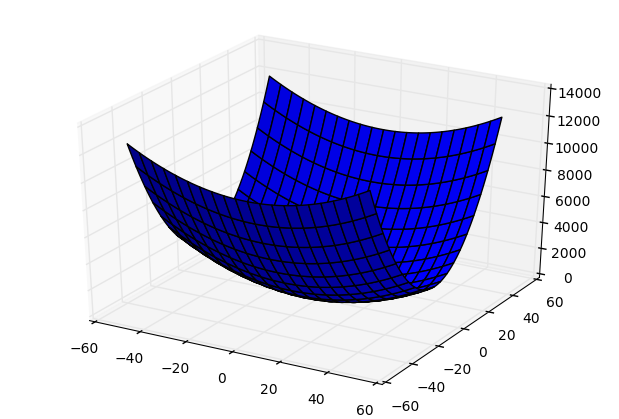

In [139]:
#VISUALIZATION
def makeData ():
    x = np.arange (-50, 50, 0.5)
    y = np.arange (-50, 50, 0.5)
    xgrid, ygrid = np.meshgrid(x, y)
    zgrid = f([xgrid, ygrid])
    return xgrid, ygrid, zgrid

x, y, z = makeData()

fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(x, y, z)
pylab.show()

In [140]:
### APPROXIMATE DERIVATIVES
def df1(x,h1):
    return (f([x[0] + h1, x[1]]) - f([x[0] - h1, x[1]])) / (2 * h1)
def df2(x,h2):
    return (f([x[0], x[1] + h2]) - f([x[0], x[1] - h2])) / (2 * h2)

def df11(x,h1):
    return (f([x[0] + h1, x[1]]) - 2 * f([x[0], x[1]])+ f([x[0] - h1, x[1]])) / (h1 * h1)
def df22(x,h2):
    return (f([x[0], x[1] + h2]) - 2 * f([x[0], x[1]])+ f([x[0], x[1] - h2])) / (h2 * h2)
def df12(x,h1,h2):
    return (f([x[0] + h1, x[1] + h2]) + f([x[0] - h1, x[1] - h2]) 
            - f([x[0] + h1, x[1] - h2]) - f([x[0] - h1, x[1] + h2])) / (4 * h1 * h2)

def grad(x,h):
    return np.array([df1(x,h[0]), df2(x,h[1])])
def gesse(x,h):
    return np.array([ [df11(x,h[0]), df12(x,h[0],h[1])], [df12(x,h[0],h[1]), df22(x,h[1])] ] )

### STOP CONDITIONS
def stop1(x1,x2,k):
    plt.ylabel('|| x_k - x_k-1 || ')
    d = norm(x2-x1, ord=2)
    plt.scatter(k, d)
    return d<=EPS

def stop2(x1,x2,k):
    plt.ylabel('| f(x_k) - f(x_k-1) | ')
    d = abs(f(x2)-f(x1))
    plt.scatter(k, d)
    return d<=EPS

def stop3(x,h,k):
    plt.ylabel('|| f\'(x_k) || ')
    d = norm(grad(x,h), ord=2)
    plt.scatter(k, d)
    return d<=EPS

# МЕТОД НЬЮТОНА

NEWTON'S METHOD:
The initial point is (-150.0, 255.0)
Approximate solution found in 2 iterations
> Approximate   x*  = (-0.0000625, 0.1250000)
> Approximate f(x*) = -0.0625000


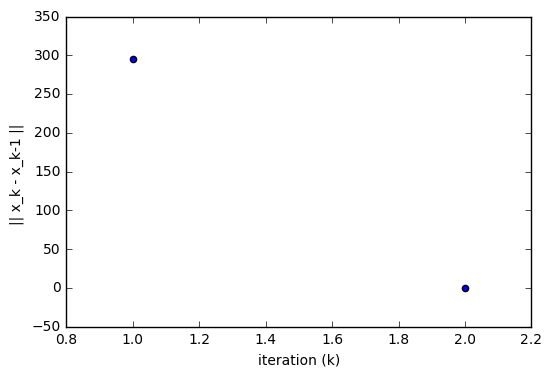

In [144]:
### THE NEWTON METHOD
# функція повинна бути опуклою та двічі диференційовною на R^n, матриця Гессе - невироджена на R^n
# якщо функція сильно опукла та двічі диференційовна, то метод збігається незалежно від вибору x0 із надлін. швидк.
# якщо ще й до цього ||f''(x)-f''(y)||<=M||x-y||або квадр. швидк.
def newton_method(x0,h):
    print('NEWTON\'S METHOD:')
    fout = open('output.txt', 'w')
    print('The initial point is ({x}, {y})'.format(x=x0[0], y=x0[1]))
    fout.write('The initial point is ({x}, {y})\n\n'.format(x=x0[0], y=x0[1]))
    x_new = x0
    k = 0
    plt.xlabel('iteration (k)')
    while (k<MAX_COUNT_ITER):
        x_old = x_new
        if f_type == 'quadratic':
            step = - x_old - inv(A).dot(b)
        else:
            matr = inv(gesse(x_old,h))
            step = - matr.dot(grad(x_old,h))
        x_new = x_old + step
        k += 1
        fout.write('{iter:>3}. x_{iter:<3} = ({x:>18.15f}, {y:>18.15f})\n'.format(iter=k, x=x_new[0], y=x_new[1]))    
        if (stop1(x_old,x_new,k)):     ### STOP CONDITION 1
        #if (stop2(x_old,x_new,k)):    ### STOP CONDITION 2
        #if (stop3(x_new,h,k)):        ### STOP CONDITION 3
            break
    print('Approximate solution found in {} iterations'.format(k))
    print('> Approximate   x*  = ({x:>9.7f}, {y:>9.7f})'.format(x=x_new[0], y=x_new[1]))
    print('> Approximate f(x*) = {f:>10.7f}'.format(f=f(x_new)))
    fout.write('\nThe approximate solution of the problem is ({x:>10.7f}, {y:>10.7f})\n'.format(x=x_new[0], y=x_new[1]))
    fout.write('The value of function in this point is {v:>10.7f}\n'.format(v=f(x_new)))
    fout.close()
    return x_new

 
### PROGRAM    
minim = newton_method(x0,h)
plt.show()

# МЕТОД НЬЮТОНА З РЕГУЛЮВАННЯМ КРОКУ

NEWTON'S METHOD WITH STEP ADJUSTMENT:
The initial point is (-150.0, 255.0)
Approximate solution found in 2 iterations
> Approximate   x*  = (-0.0000625, 0.1250000)
> Approximate f(x*) = -0.0625000


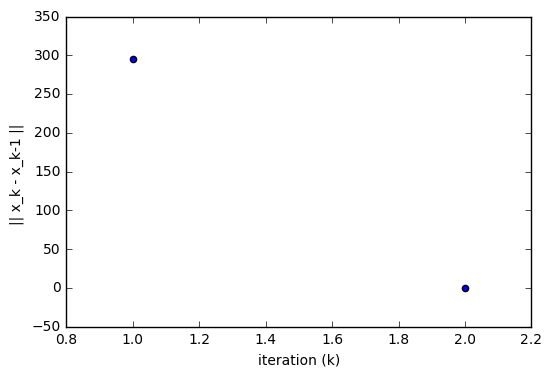

In [145]:
# функція повинна бути опуклою та двічі диференційовною на R^n, матриця Гессе - невироджена на R^n
def alpha_split(x,step,b=1,l=0.5,q=0.1):
    alpha = b
    #print('f(xk) = {0}, f(xk+1) = {1}, alpha = {2}'.format(f(x),f(x+alpha*step),alpha))
    while (f(x+alpha*step)-f(x)>q*alpha*grad(x,h).dot(step)):
        alpha *= l
        #print('f(xk) = {0}, f(xk+1) = {1}, alpha = {2}'.format(f(x),f(x+alpha*step),alpha))
    return alpha

def newton_method_alpha(x0,h):
    fout = open('output.txt', 'w')
    print('NEWTON\'S METHOD WITH STEP ADJUSTMENT:')
    fout.write('NEWTON\'S METHOD WITH STEP ADJUSTMENT:\n')
    print('The initial point is ({x}, {y})'.format(x=x0[0], y=x0[1]))
    fout.write('The initial point is ({x}, {y})\n\n'.format(x=x0[0], y=x0[1]))
    x_new = x0
    k = 0
    plt.xlabel('iteration (k)')
    while (k<MAX_COUNT_ITER):
        x_old = x_new
        if f_type == 'quadratic':
            step = - x_old - inv(A).dot(b)
        else:
            matr = inv(gesse(x_old,h))
            step = - matr.dot(grad(x_old,h))
        alpha = alpha_split(x_old,step)
        x_new = x_old + alpha * step
        k += 1
        fout.write('{iter:>3}. x_{iter:<3} = ({x:>18.15f}, {y:>18.15f})\n'.format(iter=k, x=x_new[0], y=x_new[1]))    
        if (stop1(x_old,x_new,k)):     ### STOP CONDITION 1
        #if (stop2(x_old,x_new,k)):    ### STOP CONDITION 2
        #if (stop3(x_new,h,k)):        ### STOP CONDITION 3
            break
    print('Approximate solution found in {} iterations'.format(k))
    print('> Approximate   x*  = ({x:>9.7f}, {y:>9.7f})'.format(x=x_new[0], y=x_new[1]))
    print('> Approximate f(x*) = {f:>10.7f}'.format(f=f(x_new)))
    fout.write('\nThe approximate solution of the problem is ({x:>10.7f}, {y:>10.7f})\n'.format(x=x_new[0], y=x_new[1]))
    fout.write('The value of function in this point is {v:>10.7f}\n'.format(v=f(x_new)))
    fout.close()
    return x_new

 
### PROGRAM    
minim = newton_method_alpha(x0,h)
plt.show()